In [1]:
import os
import numpy as np
import numpy.testing as npt
import scipy.optimize as spo
import matplotlib.pyplot as plt

import lyaemu.likelihood as lyl

%matplotlib inline


In [ ]:
n_model_params = 3

def transfer_function_nCDM(k, alpha, beta, gamma):
    return lyl.transfer_function_nCDM(k, alpha, beta, gamma)


In [ ]:
n_model_params = 1

def transfer_function_nCDM(k, alpha):
    return lyl.transfer_function_nCDM(k, alpha, 2.12, -4.46)


In [2]:
n_spectra = 9
log_mass_eV = [11., 10., 9., 8., 7., 6., 5., 4.]
spectra_fname = [None] * len(log_mass_eV)
spectra_fname[0] = ['LCDM_matterpower_LCDM.dat', 'n0_100GeV_sigm24_matterpower.dat',
                 'n0_100GeV_sigm25_matterpower.dat', 'n0_100GeV_sigm26_matterpower.dat',
                 'n0_100GeV_sigm27_matterpower.dat', 'n0_100GeV_sigm28_matterpower.dat',
                 'n0_100GeV_sigm29_matterpower.dat', None, None]
log_sigma_cm2 = [-24., -25., -26., -27., -28., -29., -30., -31.]


In [3]:
spectra_fname[1] = ['LCDM_matterpower_LCDM.dat', None, 'n0_10GeV_sigm25_matterpower.dat',
                 'n0_10GeV_sigm26_matterpower.dat', 'n0_10GeV_sigm27_matterpower.dat',
                 'n0_10GeV_sigm28_matterpower.dat', 'n0_10GeV_sigm29_matterpower.dat',
                 'n0_10GeV_sigm30_matterpower.dat', None]


In [4]:
spectra_fname[2] = ['LCDM_matterpower_LCDM.dat', None, None, 'n0_1GeV_sigm26_matterpower.dat',
                 'n0_1GeV_sigm27_matterpower.dat', 'n0_1GeV_sigm28_matterpower.dat',
                 'n0_1GeV_sigm29_matterpower.dat', 'n0_1GeV_sigm30_matterpower.dat', None] #,
#log_sigma_cm2 = [-26., -27., -28., -29., -30.]


In [5]:
spectra_fname[3] = ['LCDM_matterpower_LCDM.dat', None, None, None, 'n0_100MeV_sigm27_matterpower.dat',
                 'n0_100MeV_sigm28_matterpower.dat', 'n0_100MeV_sigm29_matterpower.dat',
                 'n0_100MeV_sigm30_matterpower.dat', None] #,


In [6]:
spectra_fname[4] = ['LCDM_matterpower_LCDM.dat', None, None, None, 'n0_10MeV_sigm27_matterpower.dat',
                 'n0_10MeV_sigm28_matterpower.dat', 'n0_10MeV_sigm29_matterpower.dat',
                 'n0_10MeV_sigm30_matterpower.dat', None] #,
#log_sigma_cm2 = [-27., -28., -29., -30.]


In [7]:
spectra_fname[5] = ['LCDM_matterpower_LCDM.dat', None, None, None, None,
                 'n0_1MeV_sigm28_matterpower.dat', 'n0_1MeV_sigm29_matterpower.dat',
                 'n0_1MeV_sigm30_matterpower.dat', 'n0_1MeV_sigm31_matterpower.dat'] #,
#log_sigma_cm2 = [-27., -28., -29., -30.]


In [8]:
spectra_fname[6] = ['LCDM_matterpower_LCDM.dat', None, None, None, None,
                 'n0_100keV_sigm28_matterpower.dat', 'n0_100keV_sigm29_matterpower.dat',
                 'n0_100keV_sigm30_matterpower.dat', 'n0_100keV_sigm31_matterpower.dat'] #,
#log_sigma_cm2 = [-27., -28., -29., -30.]


In [9]:
spectra_fname[7] = ['LCDM_matterpower_LCDM.dat', None, None, None, None,
                 None, 'n0_10keV_sigm29_matterpower.dat',
                 'n0_10keV_sigm30_matterpower.dat', 'n0_100keV_sigm31_matterpower.dat'] #,
#log_sigma_cm2 = [-27., -28., -29., -30.]


In [15]:
n_model_params = 1

def transfer_function_nCDM(k, alpha, beta):
    return lyl.transfer_function_nCDM(k, alpha, beta, -4.46)


0.059589557019100604 1.4936249997132394
0.01360112514657437 1.4936249997132394
0.002949409711306595 1.4936249997132394
0.0006273251723333882 1.4936249997132394
0.00013511059692286368 1.4936249997132394
3.0420542186356504e-05 1.4936249997132394
0.06692975217905077 1.5806964283328235
0.01451374492366573 1.5806964283328235
0.003087003307996833 1.5806964283328235
0.0006648654924764417 1.5806964283328235
0.00014969639112525957 1.5806964283328235
3.637570820073224e-05 1.5806964283328235
0.045640753817712695 1.667303571233762
0.00970756746489402 1.667303571233762
0.002090774119540428 1.667303571233762
0.00047074384803383904 1.667303571233762
0.00011438913606835342 1.667303571233762
0.021642143904995696 1.753446428416055
0.004661191851776496 1.753446428416055
0.0010494808445455385 1.753446428416055
0.0002550202358018292 1.753446428416055
0.03794847098218057 1.8391249998797021
0.00817317842936467 1.8391249998797021
0.0018402147934335463 1.8391249998797021
0.0004471658658530895 1.839124999879702

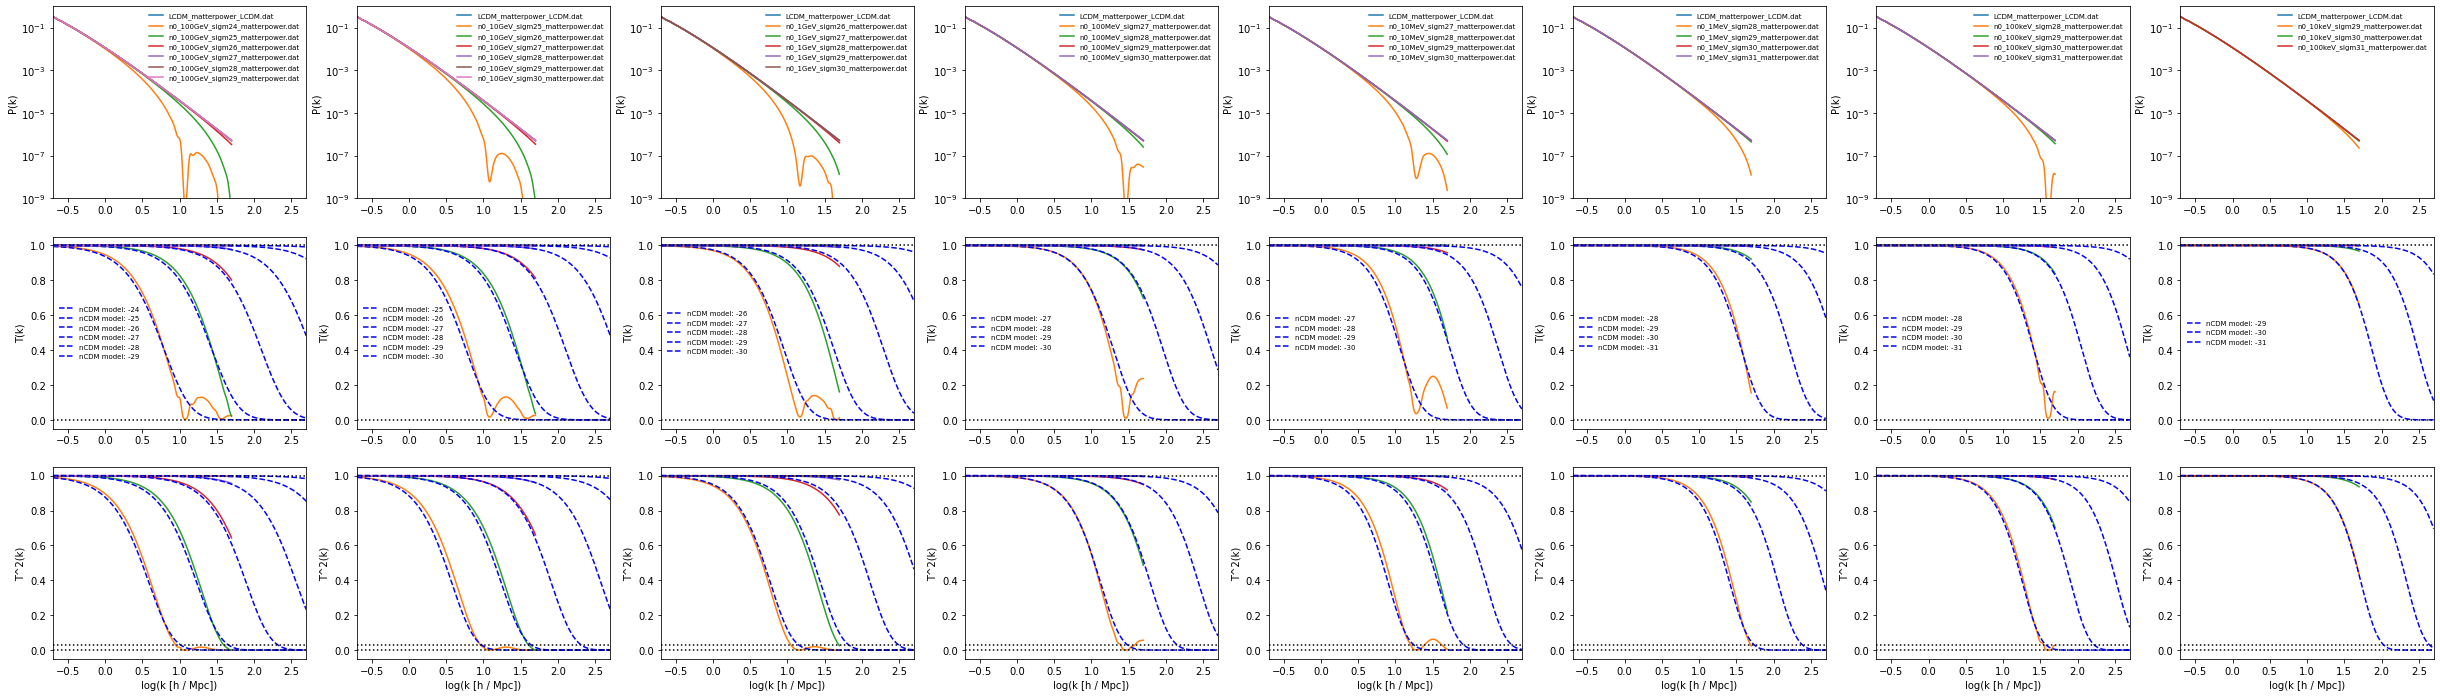

In [49]:
beta_fit = [1.540, 1.548, 1.588, 1.784, 1.875, 1.943, 2.010, 2.073]
#beta_fit = [1.695, 1.712, 1.829, 1.938, 1.982, 2.196, 2.314, 2.432]
k_cut_indices = [1., 1., 1.1, 1.3, 1.3, 1.6, 1.6, 1.7]
fname_root = '/Users/keir/Simulations/bDM'
#'n0_100MeV_sig8p8m29_matterpower.dat']

fig, axes = plt.subplots(ncols=len(log_mass_eV), nrows=3, figsize=(16. * len(log_mass_eV) / 3., 12.))
nCDM_parameters = np.zeros((len(log_mass_eV), n_spectra-1, n_model_params))
nCDM_covariance = np.zeros((len(log_mass_eV), n_spectra-1, n_model_params, n_model_params))
for m in range(len(log_mass_eV)):
    power_spectra = [None] * n_spectra
    for i in range(n_spectra):
        if spectra_fname[m][i] is None:
            continue
        power_spectra[i] = np.loadtxt(os.path.join(fname_root, spectra_fname[m][i]))
        npt.assert_array_equal(power_spectra[i][:, 0], power_spectra[0][:, 0])
        axes[0, m].plot(np.log10(power_spectra[i][:, 0]), power_spectra[i][:, 1], label=spectra_fname[m][i])
        transfer_func = np.sqrt(power_spectra[i][:, 1] / power_spectra[0][:, 1])
        axes[1, m].plot(np.log10(power_spectra[i][:, 0]), transfer_func)
        #print(transfer_func[-10:])
        axes[2, m].plot(np.log10(power_spectra[i][:, 0]), transfer_func ** 2.)

        if i > 0:
            k_plot = np.linspace(-0.7, 2.7, num=1000)
            alpha_predicted = 10. ** alpha_model(np.array([log_sigma_cm2[i-1], log_mass_eV[m]]), *alpha_parameters)
            beta_predicted = beta_model(log_mass_eV[m], *beta_parameters)
            print(alpha_predicted, beta_predicted)
            transfer_predicted = transfer_function_nCDM(10. ** k_plot, alpha_predicted, beta_predicted)
            axes[1, m].plot(k_plot, transfer_predicted, ls='--', label='nCDM model: %i'%log_sigma_cm2[i-1],
                            color='blue')
            axes[2, m].plot(k_plot, transfer_predicted ** 2, ls='--',
                            label='nCDM model: %i'%log_sigma_cm2[i-1], color='blue')

        '''if i > 0:
            #Fit nCDM parameters
            k_cut = power_spectra[i][:, 0] > 10. ** (-5.)
            #if i == 1:
            #    k_cut *= power_spectra[i][:, 0] < 10. ** (k_cut_indices[m])
            transfer_function_nCDM_beta_fit = lambda k, a: transfer_function_nCDM(k, a, beta_fit[m])
            nCDM_parameters[m, i-1, :], nCDM_covariance[m, i-1, :, :] = spo.curve_fit(transfer_function_nCDM_beta_fit,
                                                                power_spectra[i][:, 0][k_cut], transfer_func[k_cut],
                                                                p0=np.array([0.05]), maxfev=8000) #,
            #bounds=(-4.46, 10.))
            print(nCDM_parameters[m, i-1, :],
                  np.sqrt(np.diag(nCDM_covariance[m, i-1, :, :])) / nCDM_parameters[m, i-1, :])
            k_plot = np.linspace(-0.7, 2.7, num=1000)
            axes[1, m].plot(k_plot, transfer_function_nCDM_beta_fit(10. ** k_plot, *nCDM_parameters[m, i-1, :]), ls='--',
                         label='nCDM fit: %i'%log_sigma_cm2[i-1], color='grey')
            axes[2, m].plot(k_plot, transfer_function_nCDM_beta_fit(10. ** k_plot, *nCDM_parameters[m, i-1, :]) ** 2, ls='--',
                         label='nCDM fit: %i'%log_sigma_cm2[i-1], color='grey')
            #*np.array([0.015, 2.24, -4.46]) #np.log10(power_spectra[i][:, 0])
        '''

    axes[0, m].set_xlim([-0.7, 2.7])
    axes[0, m].set_ylim([1.e-9, 1.e+0])
    axes[1, m].set_xlim([-0.7, 2.7])
    axes[2, m].set_xlim([-0.7, 2.7])
    #axes[0].set_xscale('log')
    axes[0, m].set_yscale('log')
    #axes[1].set_yscale('log')
    #axes[1].set_xscale('log')
    axes[0, m].set_ylabel('P(k)')
    axes[1, m].set_ylabel('T(k)')
    axes[2, m].set_xlabel('log(k [h / Mpc])')
    axes[2, m].set_ylabel('T^2(k)')
    axes[1, m].axhline(y=0., ls=':', color='black')
    axes[1, m].axhline(y=1., ls=':', color='black')
    axes[2, m].axhline(y=0., ls=':', color='black')
    axes[2, m].axhline(y=0.03, ls=':', color='black')
    axes[2, m].axhline(y=1., ls=':', color='black')
    axes[0, m].legend(frameon=False, fontsize=7.)
    axes[1, m].legend(frameon=False, fontsize=7., loc='center left')
plt.show()


In [21]:
nCDM_parameters


array([[[6.18315819e-02],
        [1.40319800e-02],
        [2.88532384e-03],
        [6.44422058e-04],
        [1.44552516e-04],
        [3.21501828e-05],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [6.02632825e-02],
        [1.36385990e-02],
        [2.79481918e-03],
        [6.25177145e-04],
        [1.40835003e-04],
        [3.20137068e-05],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [4.86313620e-02],
        [1.06852321e-02],
        [2.15067839e-03],
        [4.85071470e-04],
        [1.12697034e-04],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [2.39942775e-02],
        [4.96281530e-03],
        [1.15185266e-03],
        [2.98576611e-04],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [3.64966646e-02],
        [7.82464797e-03],
        [1.70227886e-03],
    

In [22]:
nCDM_parameters[nCDM_parameters == 0] = None


In [31]:
def alpha_model(sigma_mass, a, b, c, d, e, f, g):
    return (a * sigma_mass[0]) + (b * sigma_mass[1]) + c + (d * (sigma_mass[0] ** 2.)) + (e * (sigma_mass[1] ** 2.)) + (f * (sigma_mass[0] ** 3)) + (g * (sigma_mass[1] ** 3))


[[-24. -25. -26. -27. -28. -29. -30. -31. -24. -25. -26. -27. -28. -29.
  -30. -31. -24. -25. -26. -27. -28. -29. -30. -31. -24. -25. -26. -27.
  -28. -29. -30. -31. -24. -25. -26. -27. -28. -29. -30. -31. -24. -25.
  -26. -27. -28. -29. -30. -31. -24. -25. -26. -27. -28. -29. -30. -31.
  -24. -25. -26. -27. -28. -29. -30. -31.]
 [ 11.  11.  11.  11.  11.  11.  11.  11.  10.  10.  10.  10.  10.  10.
   10.  10.   9.   9.   9.   9.   9.   9.   9.   9.   8.   8.   8.   8.
    8.   8.   8.   8.   7.   7.   7.   7.   7.   7.   7.   7.   6.   6.
    6.   6.   6.   6.   6.   6.   5.   5.   5.   5.   5.   5.   5.   5.
    4.   4.   4.   4.   4.   4.   4.   4.]]
[-1.20878964 -1.85288104 -2.53980544 -3.1908296  -3.83997434 -4.49281655
 -1.21994722 -1.86523024 -2.55364629 -3.20399691 -3.85128939 -4.49466404
 -1.31308357 -1.97121604 -2.66742453 -3.31419427 -3.94808751 -1.61989232
 -2.30427189 -2.93860307 -3.52494422 -1.43774682 -2.10653519 -2.7689693
 -3.3724215  -1.914266   -2.58984841 -3.208616

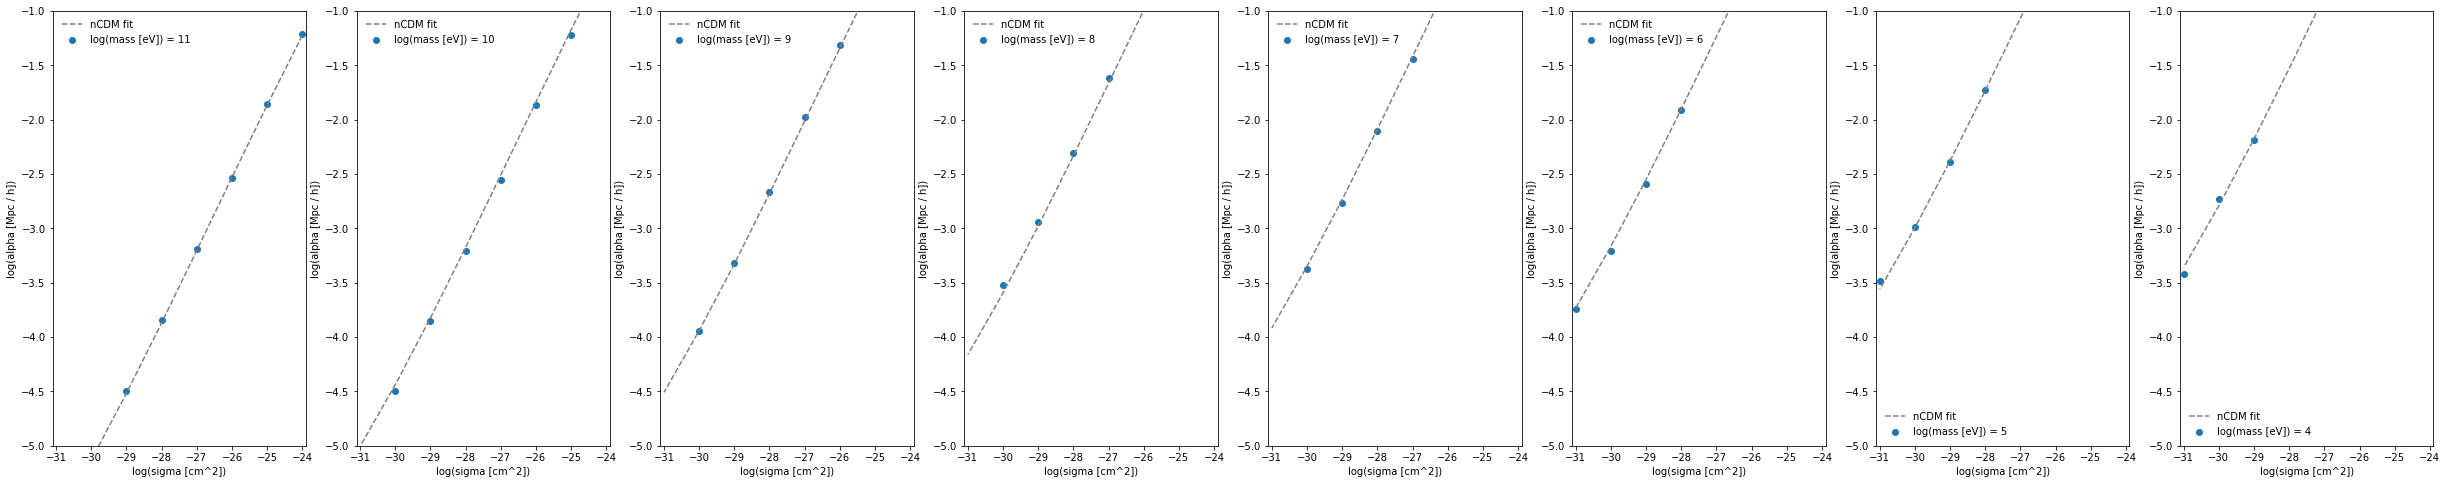

In [32]:
X1, X2 = np.meshgrid(log_sigma_cm2, log_mass_eV)
size = X1.shape
x1_1d = X1.reshape((1, np.prod(size)))
x2_1d = X2.reshape((1, np.prod(size)))
xdata = np.vstack((x1_1d, x2_1d))
print(xdata)

log_alpha = np.log10(nCDM_parameters[:, :, 0].flatten())
print(log_alpha[~np.isnan(log_alpha)])

alpha_parameters, alpha_covariance = spo.curve_fit(alpha_model, xdata[:, ~np.isnan(log_alpha)],
                                                   log_alpha[~np.isnan(log_alpha)], maxfev=8000)
print(alpha_parameters, np.sqrt(np.diag(alpha_covariance)) / alpha_parameters)

fig, axes = plt.subplots(ncols=len(log_mass_eV), nrows=1, figsize=(16. * len(log_mass_eV) / 3., 8.))
for m, mass in enumerate(log_mass_eV):
    axes[m].scatter(log_sigma_cm2, np.log10(nCDM_parameters[m, :, 0]), label='log(mass [eV]) = %i'%log_mass_eV[m])
    axes[m].plot(log_sigma_cm2, alpha_model(np.vstack((log_sigma_cm2, np.ones_like(log_sigma_cm2) * mass)),
                    *alpha_parameters), color='grey', ls='--', label='nCDM fit')
    #axes[1].scatter(log_sigma_cm2, nCDM_parameters[:, 1])
    axes[m].set_xlim([-31.1, -23.9])
    axes[m].set_ylim([-5., -1.])
    axes[m].set_xlabel('log(sigma [cm^2])')
    axes[m].set_ylabel('log(alpha [Mpc / h])')
    axes[m].legend(frameon=False)
plt.show()


In [45]:
def beta_model(mass, a, b, c): #, d):
    return (a * mass) + b + (c * (mass ** 2.)) #+ (d * (mass ** 3.))


[-8.21964286e-02  2.42587500e+00 -2.32142859e-04] [ -0.71001166   0.08482539 -16.61290428]


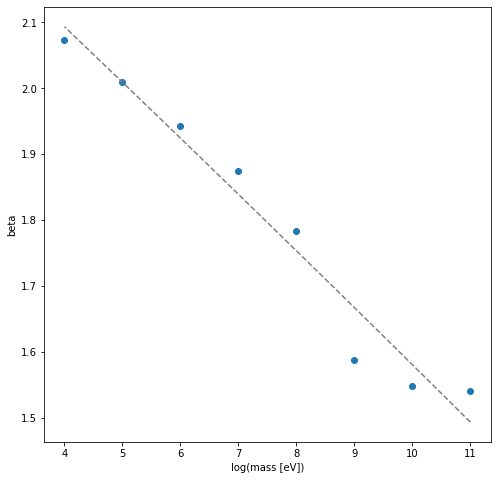

In [46]:
#log_mass_eV = [7., 9., 10.]
#beta = [2.12, 1.83, 1.72]
#beta_fit = [1.695, 1.712, 1.829, 1.938, 1.982, 2.196, 2.314, 2.432]
beta_fit = [1.540, 1.548, 1.588, 1.784, 1.875, 1.943, 2.010, 2.073]
beta_parameters, beta_covariance = spo.curve_fit(beta_model, log_mass_eV, beta_fit, maxfev=8000)
print(beta_parameters, np.sqrt(np.diag(beta_covariance)) / beta_parameters)

fig, axes = plt.subplots(ncols=1, nrows=n_model_params, figsize=(8., 8.))
axes.scatter(log_mass_eV, beta_fit)
axes.plot(log_mass_eV, beta_model(np.array(log_mass_eV), *beta_parameters), color='grey', ls='--', label='nCDM fit')
axes.set_xlabel('log(mass [eV])')
axes.set_ylabel('beta')
plt.show()


In [ ]:
plt.plot(power_spectra[1][:, 0][k_cut], transfer_func[k_cut])
plt.plot(power_spectra[1][:, 0][k_cut],
         lyl.transfer_function_nCDM(power_spectra[1][:, 0][k_cut], *np.array([0.015, 2.24, -4.46])))
plt.show()
